In [66]:
import torch

In [67]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [68]:
x.shape

torch.Size([12])

In [69]:
#张量元素的总数
x.numel()

12

In [70]:
X = x.reshape(3,4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [71]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [72]:
torch.rand(2,3,4)

tensor([[[9.4093e-01, 8.5499e-01, 5.1657e-01, 2.7253e-01],
         [9.3188e-01, 1.9781e-01, 1.2423e-01, 5.6595e-02],
         [5.8050e-01, 6.1747e-01, 9.1075e-01, 9.0146e-01]],

        [[8.2508e-01, 4.7160e-01, 2.1808e-01, 4.1957e-01],
         [4.1270e-01, 3.9852e-01, 8.6587e-01, 1.9425e-04],
         [6.0824e-01, 2.5083e-01, 3.0397e-01, 4.9451e-01]]])

In [73]:
torch.tensor([[1,2,3],[2,3,4],[4,5,6]])

tensor([[1, 2, 3],
        [2, 3, 4],
        [4, 5, 6]])

In [74]:

x = torch.tensor([0,1,2,3,4])
y = torch.tensor([2,2,2,2,2])
x/y

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000])

In [75]:
torch.exp(x)

tensor([ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981])

In [76]:
X = torch.arange(12,dtype = torch.float32).reshape(3,4)
Y = torch.tensor([[9,8,7,6],[5,4,3,2],[1,0,-1,-2]])
torch.cat((X,Y),dim = 1)

tensor([[ 0.,  1.,  2.,  3.,  9.,  8.,  7.,  6.],
        [ 4.,  5.,  6.,  7.,  5.,  4.,  3.,  2.],
        [ 8.,  9., 10., 11.,  1.,  0., -1., -2.]])

In [77]:
torch.cat((X,Y),dim = 0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 9.,  8.,  7.,  6.],
        [ 5.,  4.,  3.,  2.],
        [ 1.,  0., -1., -2.]])

In [78]:
X==Y

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [79]:
X.sum()

tensor(66.)

In [80]:
X.var(dim=1)

tensor([1.6667, 1.6667, 1.6667])

In [81]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [82]:
x.requires_grad_(True)
x.grad

In [83]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [84]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [85]:
x.grad.zero_()
x.grad

tensor([0., 0., 0., 0.])

In [86]:
y = x * x
y.sum().backward()
x.grad


tensor([0., 2., 4., 6.])

In [91]:
x.grad.zero_()
y = x*x
u = y.detach()
z = u*x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [99]:
import torch
import torch.distributions.multinomial as multinomial
from d2l import torch as d2l

In [116]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()#随机置某个索引为1，模拟掷骰子过程

tensor([1., 0., 0., 0., 0., 0.])

In [117]:
#同时抽取10个样本
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 1., 1., 1., 4., 2.])

In [118]:
#将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1620, 0.1570, 0.1720, 0.1670, 0.1810, 0.1610])

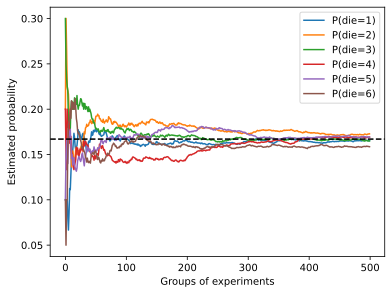

In [123]:
#做500次实验，每次抽取10个样本
counts = multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts = counts.cumsum(dim = 0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdims=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),label=('P(die=' + str (i+1) +')'))
d2l.plt.axhline(y=0.167,color='black', linestyle = 'dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()